# Muhammad Fazal Hildiansyah - DS2

## Import Library
> Hal pertama yg dilakukan adalah import library yang akan digunakan pada analisa kita

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro

# import scaler dari sckit-learn untuk scala point
from sklearn.preprocessing import MinMaxScaler

# import warning agar tidak muncul warning terus di google colab
import warnings
warnings.filterwarnings("ignore")

## Data extraction
> Setelah itu, mulai dari Data Pre-processing, start dari extract data dari source yg akan digunakan

In [ ]:
# Baca datasource dari CSV
df = pd.read_csv('https://raw.githubusercontent.com/fazalh/fellowship-ds2-eda/main/epl_1819.csv', thousands=',')

In [ ]:
# Check data ada berapa column dan row
df.shape

(20, 44)

## Data cleansing
> soal nomor 1 termasuk dari cleansing

### 1. Whether this data is clean?

In [ ]:
# karena ini adalah data per team, kita check dulu apakah tidak ada duplicate data
df['Team'].is_unique

True

In [ ]:
# Check column mana yg paling banyak missing values

df_check = df.isnull().sum().sort_values(ascending=False)

df_check[df_check > 0]

Series([], dtype: int64)

In [ ]:
# Check data types tiap column
# sebelum kita perbaiki saat extract data, terdapat beberapa data yg menjadi object yaitu :
# attack_passes, attack_passes_long, attack_passes_back, defence_clearance
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                      int64
attack_passes_through              int64
attack_passes_long                 int64
attack_passes_back                 int64
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [ ]:
df.describe()

,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,53.450000,25.250000,27.490000,17.450000,3.750362e+08,1.498508e+07,17433.100000,58.700000,2333.850000,2590.650000,666.650000,195.350000,481.650000,165.550000,9.300000,4.200000,46.400000,7.250000,61.100000,2.350000,3.350000,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,862.600000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,21.007455,1.802776,0.938588,4.071402,2.821444e+08,1.127381e+07,4192.193659,33.625022,284.745182,679.843115,75.524325,34.776391,78.333481,39.323858,3.934998,2.546411,16.044018,4.165965,10.557611,1.424411,2.433862,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,166.150661,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,16.000000,20.000000,26.100000,10.000000,8.549200e+07,3.053600e+06,10226.000000,15.000000,1774.000000,1418.000000,562.000000,140.000000,360.000000,108.000000,4.000000,1.000000,17.000000,1.000000,38.000000,0.000000,0.000000,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,543.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,39.750000,25.000000,26.800000,15.500000,1.723480e+08,6.747400e+06,15006.500000,34.500000,2248.000000,2192.750000,612.500000,174.750000,440.000000,145.000000,6.500000,2.000000,38.500000,4.750000,55.750000,1.000000,1.000000,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,768.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,51.000000,25.500000,27.250000,18.000000,2.317260e+08,9.935200e+06,16426.000000,50.500000,2325.000000,2427.000000,640.500000,193.500000,472.000000,159.500000,9.500000,4.000000,44.000000,7.000000,59.500000,2.000000,3.000000,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,888.000000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,67.000000,26.000000,28.150000,20.000000,5.882800e+08,2.326060e+07,19602.750000,78.000000,2522.750000,2838.000000,713.500000,209.250000,517.750000,185.250000,12.000000,5.000000,53.250000,10.000000,71.250000,4.000000,5.000000,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,972.750000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,98.000000,28.000000,29.700000,27.000000,1.003200e+09,3.9

> Kesimpulan dari Nomor 1 adalah data not clean. Proses cleansing dimulai dengan penyesuaian saat read csv harus ada parameter thousands agar yang ada comma tidak menjadi string/object. Setelah itu kita check duplicates team, check missing values dan describe.

### 2. How is the point distribution of the epl team? and which team is an anomaly?

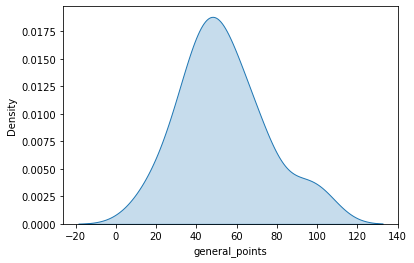

In [ ]:
# Check distribution dari general points

sns.kdeplot(df['general_points'], shade=True)

# Diperoleh hasil yg normal distribution

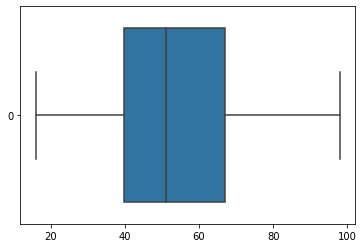

In [ ]:
# kita check data anomali menggunakan boxplot

ax = sns.boxplot(data=df['general_points'], orient="h")

# Diperoleh hasil tidak ada anomali pada general_points

In [ ]:
# Uji normalitas dengan Shapiro Wilk Test

stat, p = shapiro(df['general_points'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
 

 # Hasil Uji normalitas juga menunjukkan tidak ada anomaly karena p > alpha

Statistics=0.953, p=0.411
Sample looks Gaussian (fail to reject H0)


## Data Analysis

### 3. Which team has the best attack?

                Team         0         1         2         3     score
0    Manchester City  1.000000  1.000000  1.000000  1.000000  4.000000
1          Liverpool  0.816733  0.791165  0.776316  0.917808  3.302022
2            Chelsea  0.944223  0.835341  0.592105  0.561644  2.933314
5  Manchester United  0.733068  0.570281  0.769737  0.589041  2.662127
3          Tottenham  0.768924  0.706827  0.532895  0.616438  2.625085

0    The best team attack is Manchester City
Name: Team, dtype: object


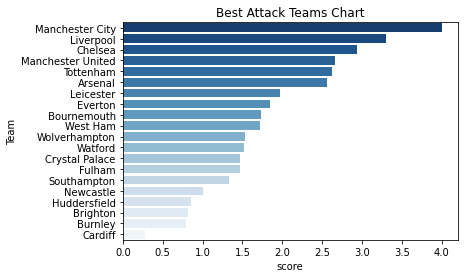

In [ ]:
# kita buat dataframe untuk soal nomor 3
attack = df[['Team','attack_pass_accuracy','attack_posession','attack_shots_on_target','attack_scored']].reset_index()

# gunakan MinMaxScaler dengan range dari 0 - 1
scaler = MinMaxScaler(feature_range=(0,1))

# pisahkan number dan category
attack_number = attack[['attack_pass_accuracy','attack_posession','attack_shots_on_target','attack_scored']]
attack_name = attack['Team']

# run scaler dan jadikan dataframe presult
scaler.fit(attack_number)
attack_result = pd.DataFrame(scaler.transform(attack_number))

# Jumlahkan semua hasil parameter kolom score
attack_result['score'] = attack_result.sum(axis=1)

# kita gabungkan dengan dataframe attack_name dan sort values descending based on Score
attack = pd.concat([attack_name, attack_result], axis=1, sort=False)
attack = attack.sort_values(by=['score'], ascending=False)
print(attack.head())
print('\r')

# Bar Chart top 5 
ax = sns.barplot(y=attack['Team'], x=attack['score'], data=attack, palette="Blues_r").set_title('Best Attack Teams Chart')

print('The best team attack is ' + attack['Team'][attack['score'] == attack['score'].max()])

### 4. Which team has the best defense?

               Team  defence_goals_conceeded  ...  defence_saves  defence_rate
1         Liverpool                       22  ...             76      0.142857
3         Tottenham                       39  ...            121      0.167382
6     Wolverhampton                       46  ...            100      0.185484
14          Burnley                       68  ...            140      0.187845
0   Manchester City                       23  ...             58      0.190083

[5 rows x 5 columns]

1    The best team defence is Liverpool
Name: Team, dtype: object


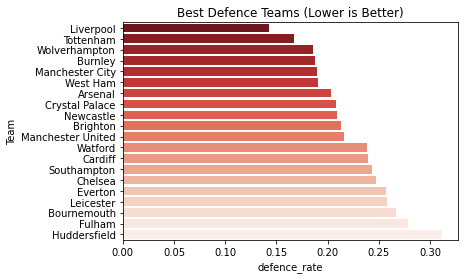

In [ ]:
# Hitung jumlah kebobolan berbanding dengan defence tim tersebut
# semakin rendah, semakin baik team tersebut dalam defence
df['defence_rate'] = df['defence_goals_conceeded'] /(df['defence_blocks'] + df['defence_saves'])


# kita pisahkan untuk data defence dan sort values based on defence rate
defence = df[['Team','defence_goals_conceeded','defence_blocks','defence_saves','defence_rate']].sort_values(by=['defence_rate'])
print(defence.head())
print('\r')

# Bar Chart top 5 
ax = sns.barplot(y=defence['Team'], x=defence['defence_rate'], data=defence, palette="Reds_r").set_title('Best Defence Teams (Lower is Better)')

print('The best team defence is ' + defence['Team'][defence['defence_rate'] == defence['defence_rate'].min()])

### 5. Which team is good in financial aspect?

              Team         0         1         2     score
0  Manchester City  1.000000  1.000000  0.974213  2.974213
1        Liverpool  0.860853  0.818286  1.000000  2.679139
2          Chelsea  0.729092  0.756197  0.885388  2.370677
3        Tottenham  0.713605  0.708012  0.871060  2.292677
4          Arsenal  0.648082  0.671573  0.816619  2.136274

0    The good team in financial is Manchester City
Name: Team, dtype: object


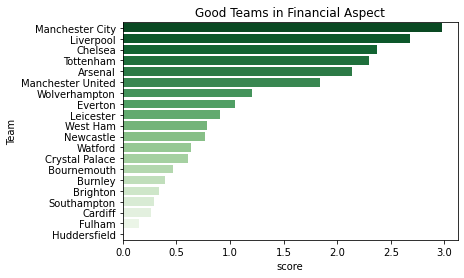

In [ ]:
# kita buat dataframe untuk soal nomor 5

finance = df[['Team','finance _market_average','finance _team_market','finance _tv_revenue']].reset_index()

# gunakan MinMaxScaler dengan range dari 0 - 1
scaler = MinMaxScaler(feature_range=(0,1))

# pisahkan number dan category
finance_number = finance[['finance _market_average','finance _team_market','finance _tv_revenue']]
finance_name = finance['Team']

# run scaler dan jadikan dataframe presult
scaler.fit(finance_number)
finance_result = pd.DataFrame(scaler.transform(finance_number))

# Jumlahkan semua hasil parameter kolom score
finance_result['score'] = finance_result.sum(axis=1)

# kita gabungkan dengan dataframe finance_name dan sort values descending based on Score
finance = pd.concat([finance_name, finance_result], axis=1, sort=False)
finance = finance.sort_values(by=['score'], ascending=False)
print(finance.head())
print('\r')

# Bar Chart top 5 
ax = sns.barplot(y=finance['Team'], x=finance['score'].sort_values(ascending=False), data=finance, palette="Greens_r").set_title('Good Teams in Financial Aspect')

print('The good team in financial is ' + finance['Team'][finance['score'] == finance['score'].max()])

### 6. Creativity

#### Which team is the worst in violation and have lost the most?

            Team    0         1         2     score
10       Watford  0.8  1.000000  0.555556  2.355556
19  Huddersfield  0.8  0.435897  1.000000  2.235897
18        Fulham  0.4  0.769231  0.925926  2.095157
16      Brighton  0.8  0.564103  0.703704  2.067806
8      Leicester  1.0  0.487179  0.555556  2.042735

10    The worst team is Watford
Name: Team, dtype: object


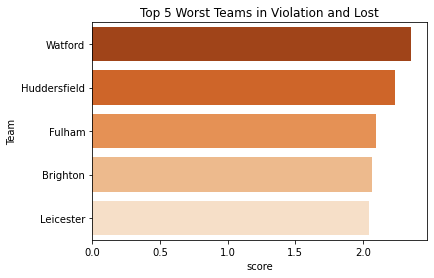

In [ ]:
# kita buat dataframe untuk soal nomor 6

worst = df[['Team','general_card_red','general_card_yellow','general_lost']].reset_index()

# gunakan MinMaxScaler dengan range dari 0 - 1
scaler = MinMaxScaler(feature_range=(0,1))

# pisahkan number dan category
worst_number = worst[['general_card_red','general_card_yellow','general_lost']]
worst_name = worst['Team']

# run scaler dan jadikan dataframe worst_result
scaler.fit(worst_number)
worst_result = pd.DataFrame(scaler.transform(worst_number))

# Jumlahkan semua hasil parameter kolom score
worst_result['score'] = worst_result.sum(axis=1)

# kita gabungkan dengan dataframe worst_name dan sort values descending based on Score
worst = pd.concat([worst_name, worst_result], axis=1, sort=False)
worst = worst.sort_values(by=['score'], ascending=False)
print(worst.head())
print('\r')

# Bar Chart top 5 
ax = sns.barplot(y=worst['Team'].head(), x=worst['score'].head().sort_values(ascending=False), data=worst, palette="Oranges_r").set_title('Top 5 Worst Teams in Violation and Lost')

print('The worst team is ' + worst['Team'][worst['score'] == worst['score'].max()])

#### Is there any correlation between Lost, Red, and Yellow Card ?

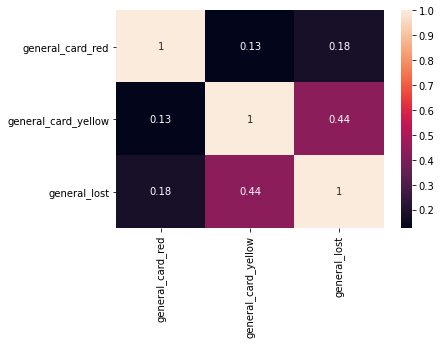

In [ ]:
lost_red = df[['Team','general_card_red','general_card_yellow','general_lost']]

corrMatrix = lost_red.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Finish